# Problem statement

Problem Statement - Part I
This assignment contains two parts. Part-I is a programming assignment (to be submitted in a Jupyter Notebook), and Part-II includes subjective questions (to be submitted in a PDF file). 

 

Part-II is given on the next page.

 

Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
######## Importing necessary libraries and reading data </h2>

In [2]:
import pandas as pd #Data Processing
import numpy as np #Linear Algebra
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization

In [3]:
import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings
pd.set_option('display.max_rows', None)# to display all the rows
#pd.options.display.float_format = '{:.2f}'.format

In [5]:
df_house = pd.read_csv("train.csv")
df_house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_house.shape

(1460, 81)

## EDA

In [8]:
print("duplicate rows : ",df_house.duplicated().sum())
print("columns in which all values are null",df_house.isnull().all(axis=1).sum())
print("rows in which all values are null",df_house.isnull().all(axis=0).sum())

duplicate rows :  0
columns in which all values are null 0
rows in which all values are null 0


In [9]:
100*df_house.isnull().mean().sort_values(ascending=False)#rows in which most of the values are null

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

###### Removing columns which have more than 30 % missing values as they are not beneficial, because even if we impute them, most of the values remain same and which will not help in our analysis.


In [10]:
df_house.shape

(1460, 81)

In [11]:
rm_cols = df_house.columns[df_house.isnull().mean() * 100 >= 30.00 ]
df_house.drop(rm_cols, axis=1, inplace=True)

In [12]:
df_house.shape

(1460, 75)

In [13]:
#Validating the null values again
100*df_house.isnull().mean().sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
Electrical        0.068493
WoodDeckSF        0.000000
PavedDrive        0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
SaleCondition     0.000000
BedroomAbvGr      0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
PoolArea          0.000000
Functional        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
GarageCars        0.000000
G

### Replace the missing values for numarical columns

In [14]:
null_cols = df_house.columns[df_house.isnull().any()]
df_house[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [15]:
df_house['LotFrontage'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
print(df_house['MasVnrArea'].describe(percentiles=[.25, .5, .75, .90, .95, .99]))
print(df_house['MasVnrArea'].median())

print(df_house['GarageYrBlt'].describe(percentiles=[.25, .5, .75, .90, .95, .99]))
print(df_house['GarageYrBlt'].median())

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64
0.0
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
1980.0


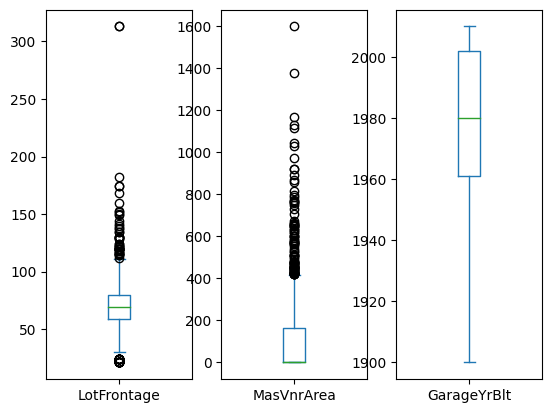

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1980.0
dtype: float64

In [17]:
df_house[["LotFrontage", "MasVnrArea",'GarageYrBlt']].plot(kind= "box", subplots= True)
plt.show()
df_house[["LotFrontage", "MasVnrArea",'GarageYrBlt']].median()

In [18]:
# We will replace the null with median for LotFrontage MasVnrArea and GarageYrBlt columns
df_house["LotFrontage"].fillna(df_house["LotFrontage"].median(), inplace=True)
df_house["MasVnrArea"].fillna(df_house["MasVnrArea"].mean(), inplace=True)
df_house["GarageYrBlt"].fillna(df_house["GarageYrBlt"].median(), inplace=True)

### Replaceing categorical columns

In [19]:
# Electrical system type  Filling the Electrical with the mode
df_house['Electrical'] = df_house['Electrical'].fillna(df_house['Electrical'].mode()[0])

In [20]:
#Validating the null values again
df_house.columns[df_house.isnull().any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [21]:
#As mentioned in the Data Dictionary NA value means it is not present and thus we can replace it with none
null_with_meaning = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    df_house[i].fillna("none", inplace=True)

In [22]:
null_cols = df_house.columns[df_house.isnull().any()]
df_house[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame


In [23]:
df_house.drop('Id',axis=1,inplace=True)

In [24]:
#df_house = df_house.round(decimals = 2)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Deriving variables

In [25]:
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df_house['Total_sqr_footage'] = (df_house['BsmtFinSF1'] + df_house['BsmtFinSF2'] + df_house['1stFlrSF'] + df_house['2ndFlrSF']) + df_house['GrLivArea']
# Creating derived column for total number of bathrooms column
df_house['Total_Bathrooms'] = (df_house['FullBath'] + (0.5 * df_house['HalfBath']) + df_house['BsmtFullBath'] + (0.5 * df_house['BsmtHalfBath']))
#Creating derived column for total porch area 
df_house['Total_porch_sf'] = (df_house['OpenPorchSF'] + df_house['3SsnPorch'] + df_house['EnclosedPorch'] + df_house['ScreenPorch'] + df_house['WoodDeckSF'])


In [26]:
#Lets drop these extra columns :
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
df_house.drop(extraCols,axis=1,inplace=True)
df_house.shape# verifying the shape of the dataset

(1460, 63)

In [27]:
# Creating a new Column to determine the age of the property
df_house['Total_Age']=df_house['YrSold']-df_house['YearBuilt']
df_house['Garage_age'] = df_house['YrSold'] - df_house['GarageYrBlt']
df_house['Remodel_age'] = df_house['YrSold'] - df_house['YearRemodAdd']
#Also lets drop out variables like GarageYrBlt and YearRemodAdd as we are already calculating the number of years
drop_cols = ['GarageYrBlt','YearRemodAdd','YearBuilt']
df_house.drop(labels = drop_cols, axis = 1, inplace=True) #Dropping the columns added in the list
print("The new size of the data is" , df_house.shape) #Printing the new Dataset Shape

The new size of the data is (1460, 63)


### Correlation of  Numerical columns

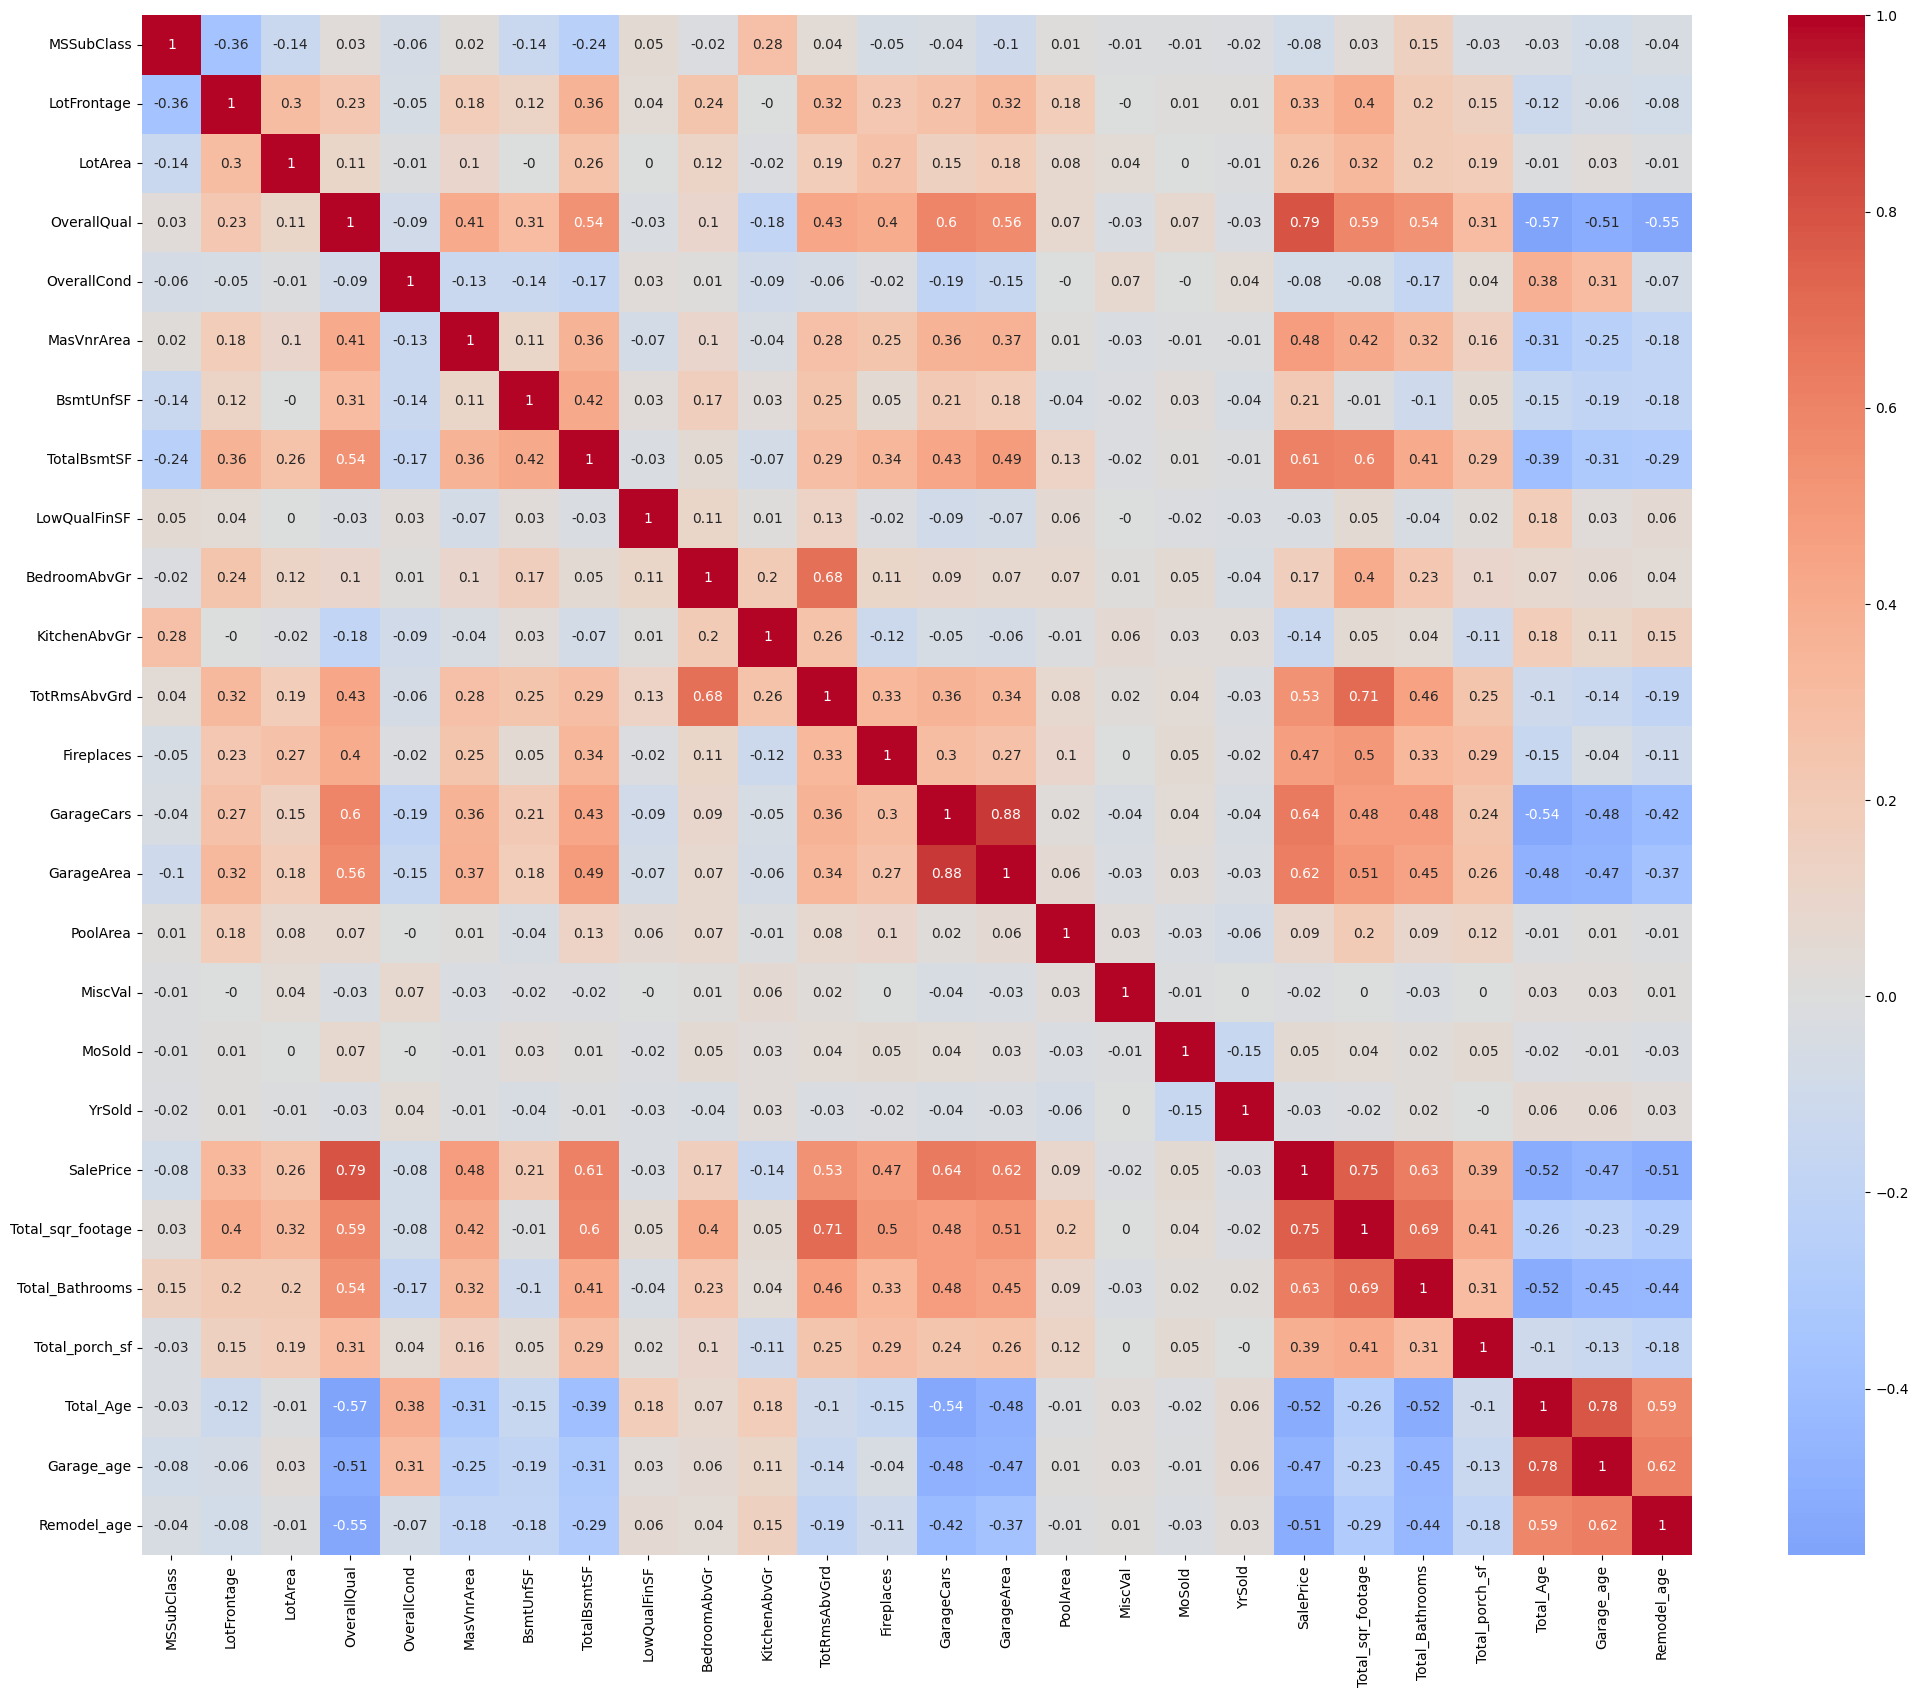

In [28]:
# Checking the corelation
numeric_columns = df_house.select_dtypes(include=[np.number])
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(numeric_columns.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [29]:
numeric_columns = df_house.select_dtypes(include=[np.number])
important_num_cols = list(numeric_columns.corr()["SalePrice"][(numeric_columns.corr()["SalePrice"]>0.50) | (numeric_columns.corr()["SalePrice"]<-0.50)].index)
important_num_cols #columns highly correlated with SalePRice

['OverallQual',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_Age',
 'Remodel_age']

<Figure size 7000x9000 with 0 Axes>

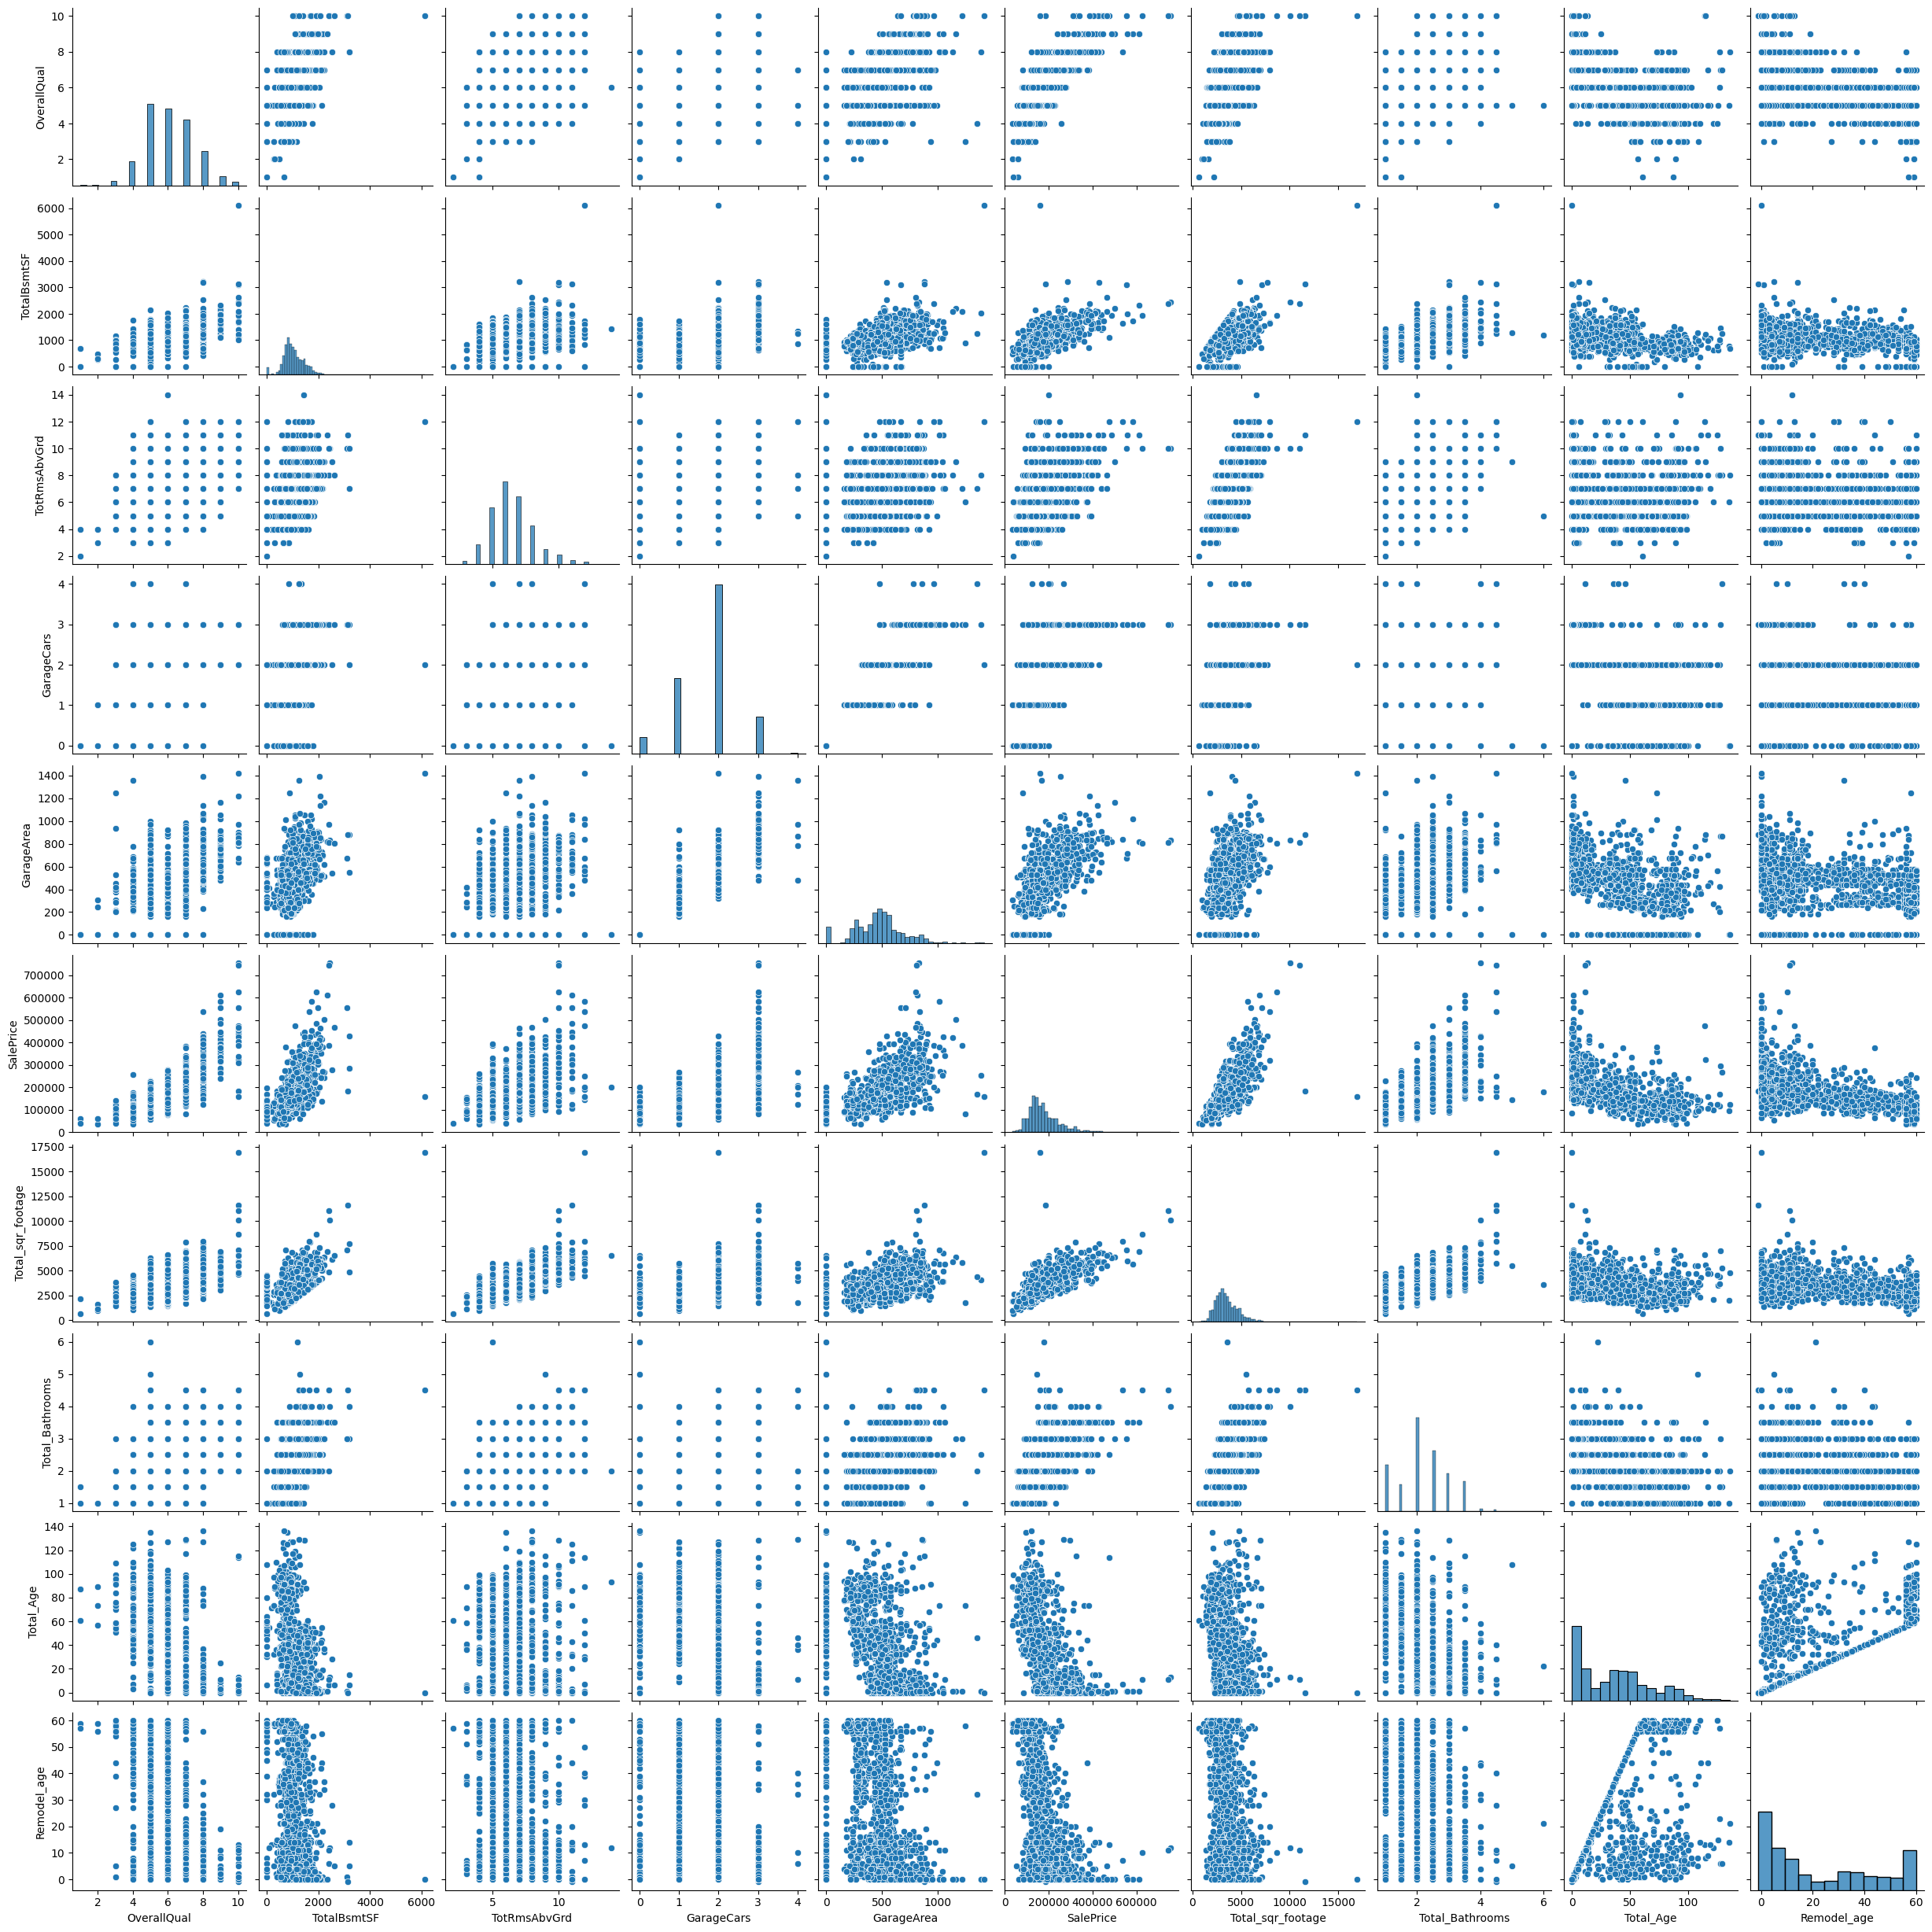

In [30]:
plt.figure(figsize = (70, 90))
sns.pairplot(df_house, vars= important_num_cols)
plt.show()

### Outlier Analysis

In [31]:
#Lets divide the Columns based on Numerical/continous and categorical
Cat_cols = []
Num_cols = []
for i in df_house.columns :
    if df_house[i].dtype == "object":
        Cat_cols.append(i)
    else:
        Num_cols.append(i)
cat_info_df = pd.DataFrame({
    'Categorical Column': Cat_cols,
    'Info': [df_house[col].dtypes for col in Cat_cols],
    'Num Unique': [df_house[col].nunique() for col in Cat_cols]
})
print(cat_info_df)
num_info_df = pd.DataFrame({
    'Numerical Column': Num_cols,
    'Info': [df_house[col].dtypes for col in Num_cols],
    'Num Unique': [df_house[col].nunique() for col in Num_cols]
})
print(num_info_df)

   Categorical Column    Info  Num Unique
0            MSZoning  object           5
1              Street  object           2
2            LotShape  object           4
3         LandContour  object           4
4           Utilities  object           2
5           LotConfig  object           5
6           LandSlope  object           3
7        Neighborhood  object          25
8          Condition1  object           9
9          Condition2  object           8
10           BldgType  object           5
11         HouseStyle  object           8
12          RoofStyle  object           6
13           RoofMatl  object           8
14        Exterior1st  object          15
15        Exterior2nd  object          16
16          ExterQual  object           4
17          ExterCond  object           5
18         Foundation  object           6
19           BsmtQual  object           5
20           BsmtCond  object           5
21       BsmtExposure  object           5
22       BsmtFinType1  object     

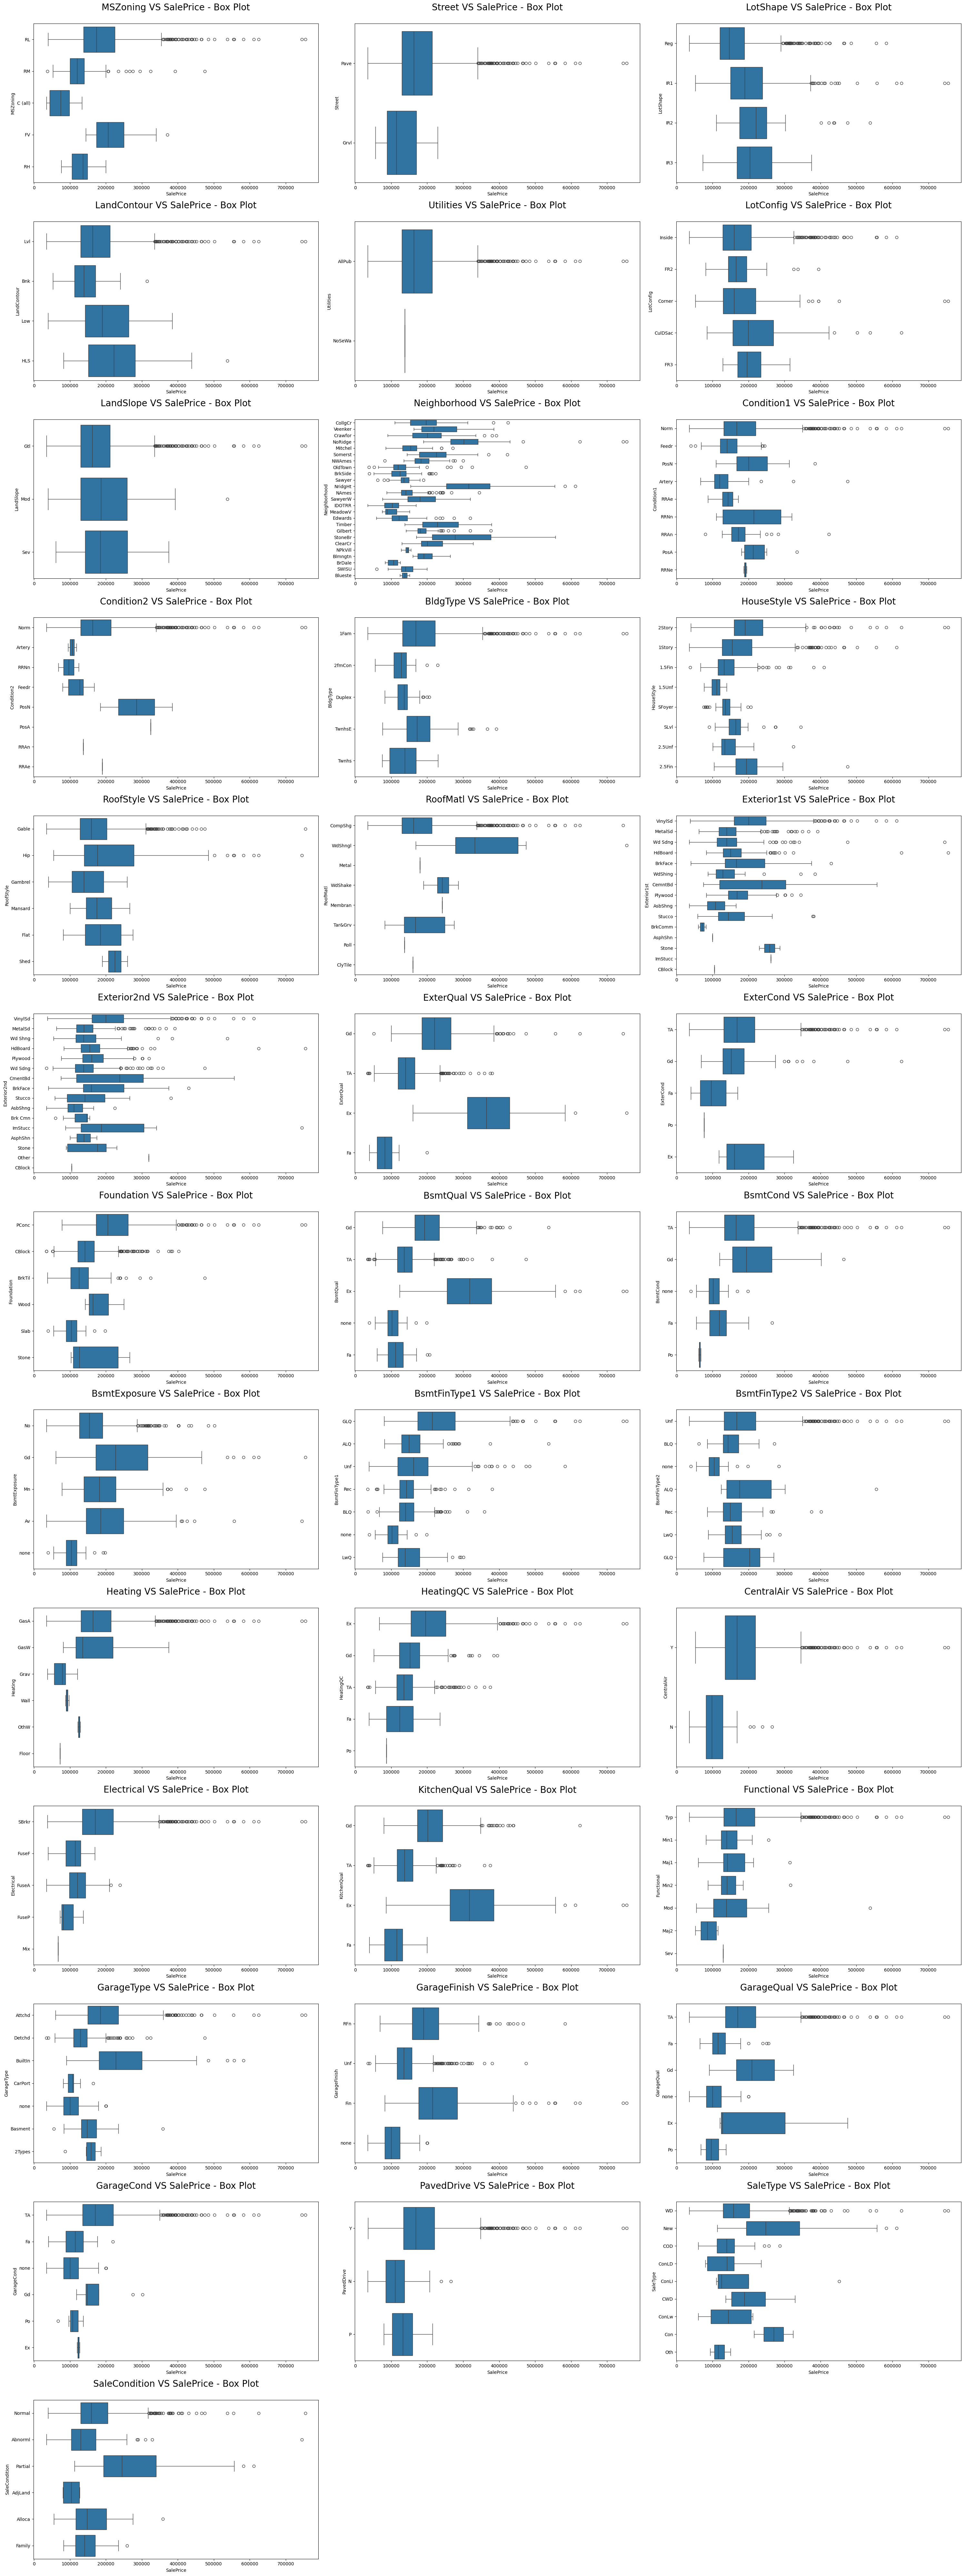

In [32]:
#Lets plot SalePrice against all the categorical columns
plt.figure(figsize=(30,80))#The size of the plot
c=0
num_cols = 3
num_rows = (len(Cat_cols) - 1) // num_cols + 1  # Calculate the number of rows needed
for i in Cat_cols:
    c=c+1
    plt.subplot(num_rows,num_cols,c)
    sns.boxplot(x = 'SalePrice', y = df_house[str(i)], data = df_house)
    plt.title(str(i)+" VS SalePrice - Box Plot\n",fontsize=20)#The title of the plot    
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

In [33]:
#As we can observe there are outlier in many columns, listing them below
outlier = ['LotFrontage','LotArea','Total_sqr_footage','Total_porch_sf']
for i in outlier:
    qnt = df_house[i].quantile(0.98)#removing data above 98 percentile
    df_house = df_house[df_house[i] < qnt]

In [34]:
df_house.shape

(1343, 63)

## Data Preparation

### Creating dummy columns for categorical columns

In [35]:
df_house = pd.get_dummies(df_house,drop_first=True)
df_house.info()#displaying the updated Datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 0 to 1458
Columns: 225 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(199), float64(4), int64(22)
memory usage: 544.3 KB


In [36]:
df_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,150,856,0,3,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,284,1262,0,3,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,434,920,0,3,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,540,756,0,3,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,490,1145,0,4,...,False,False,False,False,True,False,False,False,True,False


In [37]:
bool_columns = df_house.select_dtypes(include=['bool'])
def map_bool(col):
    return col.map({True:1,False:0})
df_house[bool_columns.columns] =  df_house[bool_columns.columns].apply(map_bool)

In [38]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 0 to 1458
Columns: 225 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(221)
memory usage: 2.3 MB


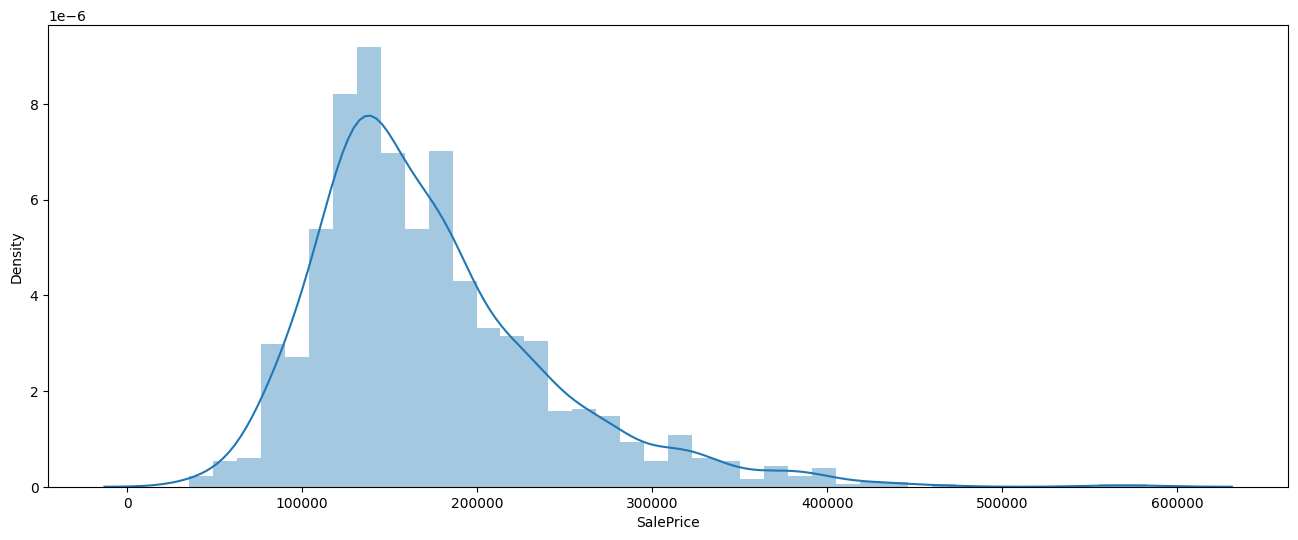

In [39]:
plt.figure(figsize=(16,6))
sns.distplot(df_house.SalePrice)
plt.show()

In [40]:
df_house.shape

(1343, 225)

## Dividing the Data in terms of TRAIN and TEST. 

In [41]:
# Using Sklearn and stats model for modeling

In [42]:
from sklearn.model_selection import train_test_split #for spliting the data in terms of train and test
from sklearn.preprocessing import MinMaxScaler #for performing minmax scaling on the continous variables of training data
from sklearn.feature_selection import RFE #for performing automated Feature Selection
from sklearn.linear_model import LinearRegression #to build linear model
from sklearn.linear_model import Ridge #for ridge regularization
from sklearn.linear_model import Lasso #for lasso regularization
from sklearn.model_selection import GridSearchCV #finding the optimal parameter values
from sklearn.metrics import r2_score #for calculating the r-square value
import statsmodels.api as sm #for add the constant value
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF
from sklearn.metrics import mean_squared_error #for calculating the mean squared error

In [43]:
#Here we will keep the train size as 70% and automatically test size will be rest 30%
#Also we will keep random_state as a fixed value of 100 so that the data set does no changes
df_train,df_test = train_test_split(df_house, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (940, 225)
The Size of Test data is (403, 225)


###  Scaling

In [44]:
Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[Num_cols] = Scaler.fit_transform(df_train[Num_cols])
df_test[Num_cols] = Scaler.transform(df_test[Num_cols])

In [45]:
#Define X_train and y_train
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train #This contains all the Independent Variables except the Target Variable
#Since 'SalePrice' is the target variable we will keep it only on y-train and remove it from X_train

In [46]:
y_test = df_test.pop('SalePrice')
X_test = df_test

##  Model :1 Automated Process using RFE and VIF

In [47]:
X_train.shape

(940, 224)

In [48]:
#Fit the Model
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=100)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 20),
 ('LotFrontage', False, 97),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 48),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 8),
 ('LowQualFinSF', False, 55),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 32),
 ('GarageCars', False, 119),
 ('GarageArea', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 106),
 ('YrSold', False, 100),
 ('Total_sqr_footage', True, 1),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', False, 25),
 ('Total_Age', True, 1),
 ('Garage_age', False, 58),
 ('Remodel_age', False, 61),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 4),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 6),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', False, 120),
 ('LotShape_IR3', False, 15),
 ('LotShape_Reg', False, 77),
 ('LandContour_HLS', False, 84),
 ('LandContour_Low', False, 18),
 ('LandContour_Lvl'

In [49]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'PoolArea', 'MiscVal',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_Age', 'MSZoning_FV',
       'MSZoning_RL', 'Street_Pave', 'Utilities_NoSeWa', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn'

In [50]:
#Creating X_train using RFE selected variables
#We are using the function of statsmodels here
X_train_rfe = X_train[Rfe_Cols] #X_train_rfe will now have all the RFE selected features
X_train_rfe = sm.add_constant(X_train_rfe) # adding the constant c to the variables to form the equation y = mx + c
X_train_rfe.shape

(940, 101)

In [51]:
#Running the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [52]:
#Stats summary of the model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.1
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:35:07   Log-Likelihood:                 1914.1
No. Observations:                 940   AIC:                            -3654.
Df Residuals:                     853   BIC:                            -3233.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0700 

In [53]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
95,GarageCond_TA,inf
33,Condition2_RRAe,inf
96,GarageCond_none,inf
44,Exterior1st_CBlock,inf
93,GarageCond_Gd,inf
50,Exterior2nd_CBlock,inf
94,GarageCond_Po,inf
61,BsmtQual_none,inf
63,BsmtCond_none,inf
66,BsmtFinType1_none,inf


In [54]:
# Many variables have high correlation

In [55]:
rfe = RFE(lr)
rfe.fit(X_train_rfe,y_train)
col = X_train_rfe.columns[rfe.support_]
X_train_rfe = X_train_rfe[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:35:10   Log-Likelihood:                 1789.2
No. Observations:                 940   AIC:                            -3490.
Df Residuals:                     896   BIC:                            -3277.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.213e+09 

In [56]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
45,GarageCond_Fa,inf
22,Exterior1st_CBlock,inf
17,Condition2_RRAe,inf
44,GarageQual_TA,inf
21,RoofStyle_Shed,inf
32,Heating_GasA,inf
46,GarageCond_Gd,inf
47,GarageCond_Po,inf
48,GarageCond_TA,inf
23,Exterior2nd_CBlock,inf


In [57]:
rfe=rfe.fit(X_train_rfe,y_train)

In [58]:
print(X_train_rfe.shape)
print(y_train.shape)

(940, 51)
(940,)


In [59]:
y_train_pred = rfe.predict(X_train_rfe)

In [60]:
## Train score

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.040582976524661515

On average, the squared difference between the actual and predicted values is On average, the squared difference between the actual and predicted values is 5.22.

In [62]:
r_squared = r2_score(y_train, y_train_pred)
r_squared

0.892961031888519

In [63]:
# Create a list of columns to drop from X_test
columns_to_drop = [col for col in X_test.columns if col not in X_train_rfe.columns]
print(len(columns_to_drop))
print(X_test.shape)


174
(403, 224)


In [64]:
## Test score

In [65]:
X_test_rfe = X_test.drop(columns=columns_to_drop)
X_test_rfe.shape

(403, 50)

In [66]:
rfe=rfe.fit(X_test_rfe,y_test)
y_test_pred = rfe.predict(X_test_rfe)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(r2_score(y_test, y_test_pred))

0.03943445902844407
0.9024503770845567


## Model 2: Ridge and Lasso

In [67]:
## lets perform Rige and Lasso on the columns given by rfe

## Ridge - Regularization

In [68]:
print(X_train_rfe.shape)
print(y_train.shape)
X_train = X_train_rfe


(940, 51)
(940,)


In [69]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,1.0,-0.025526,-0.027323,1
11,0.9,-0.025489,-0.027327,2
10,0.8,-0.025451,-0.027334,3
9,0.7,-0.025413,-0.027346,4
8,0.6,-0.025376,-0.027366,5
7,0.5,-0.025339,-0.027397,6
13,2.0,-0.025916,-0.027405,7
6,0.4,-0.025302,-0.027437,8
5,0.3,-0.025264,-0.027487,9
4,0.2,-0.025223,-0.027550,10


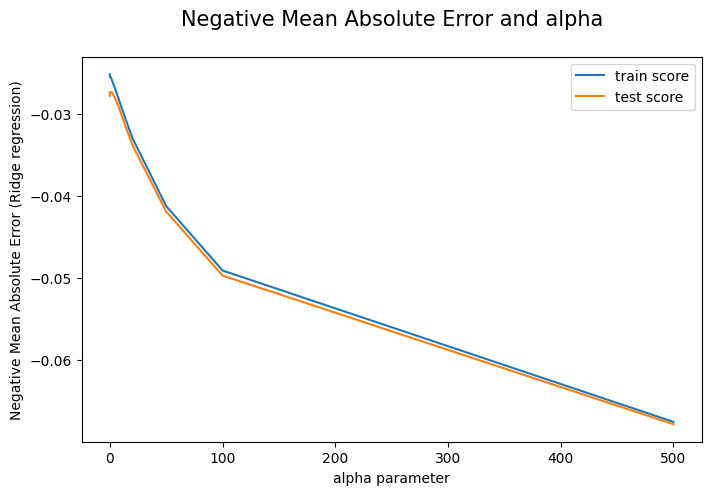

In [71]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
ridge_model_cv.best_params_

{'alpha': 1.0}

In [73]:
## Train score

In [74]:
# Hyperparameter lambda = 1.0
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
#ridge.coef_
#Lets calculate the mean squared error value
mse = mean_squared_error(y_train, ridge.predict(X_train))
print("The mean squared error value is ",mse)
# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The mean squared error value is  0.0013402777692339
The r2 value of train data is  0.9128938268574391


In [75]:
## Test score

In [76]:
# Create a list of columns to drop from X_test
columns_to_drop = [col for col in X_test.columns if col not in X_train.columns]
print(len(columns_to_drop))
print(X_test.shape)
X_test_rfe = X_test.drop(columns=columns_to_drop)
ridge.fit(X_test_rfe,y_test)
y_test_pred = ridge.predict(X_test_rfe)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(r2_score(y_test, y_test_pred))

174
(403, 224)
0.039247725758071256
0.9033720396193562


In [77]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_test.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [78]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
8,LowQualFinSF,0.237707
1,LotFrontage,0.181180
12,Fireplaces,0.093996
0,MSSubClass,0.090422
2,LotArea,0.079129
6,BsmtUnfSF,0.062856
15,PoolArea,0.056957
13,GarageCars,0.054825
9,BedroomAbvGr,0.051661
14,GarageArea,0.046775


## 9.3 Lasso - Regularization

In [79]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.025815,-0.027356,1
1,0.0002,-0.026394,-0.027602,2
2,0.0003,-0.026897,-0.028060,3
3,0.0004,-0.027545,-0.028690,4
4,0.0005,-0.028305,-0.029426,5
5,0.001,-0.031726,-0.032461,6
6,0.002,-0.034447,-0.034865,7
7,0.003,-0.036620,-0.036985,8
8,0.004,-0.039353,-0.039719,9
9,0.005,-0.042696,-0.043141,10


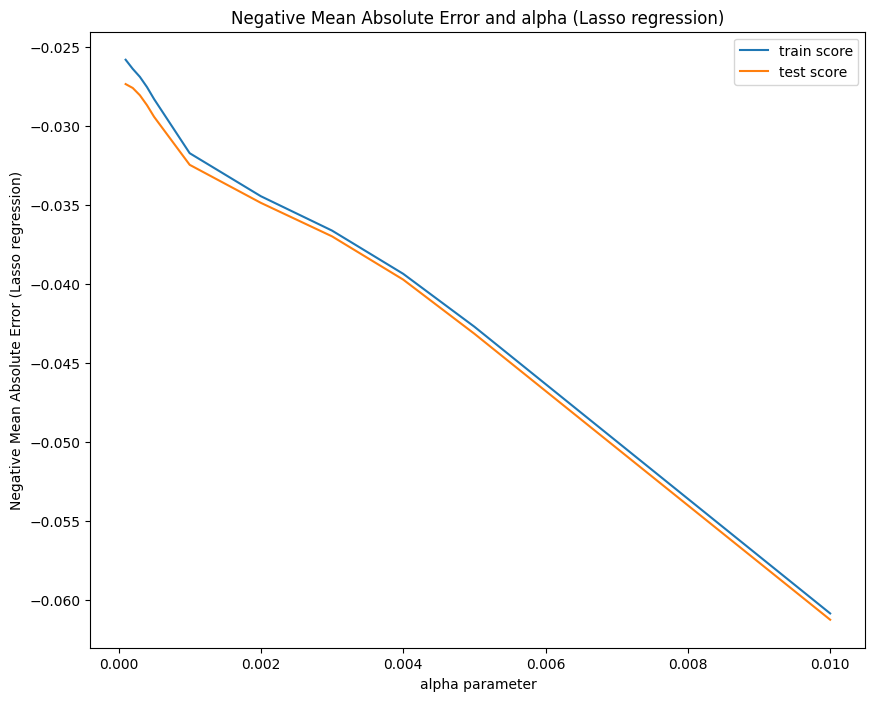

In [81]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [83]:
# # Hyperparameter lambda = 0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.        ,  0.14936811,  0.07683105,  0.07566492, -0.07053207,
       -0.11401635,  0.05506468, -0.        ,  0.29853129,  0.04153133,
       -0.10228039,  0.01518065,  0.03516087,  0.04418029,  0.04738503,
        0.08101888, -0.        , -0.        , -0.04706271, -0.03554114,
       -0.02340574, -0.        , -0.        , -0.        , -0.        ,
       -0.04301898, -0.04935221, -0.05051161, -0.02254578, -0.        ,
       -0.        , -0.        ,  0.00277795, -0.00666772, -0.        ,
       -0.        ,  0.        , -0.04908881, -0.04489768, -0.05603447,
       -0.07706967, -0.00870119,  0.00747869, -0.        , -0.00106238,
       -0.        , -0.        , -0.        , -0.        ,  0.06879055,
        0.03647498])

In [84]:
## X_train score

In [85]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_train, lasso.predict(X_train))
print("The mean squared error value is ",mse)
# predicting the R2 value of train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The mean squared error value is  0.0013669680543668022
The r2 value of train data is  0.9111591949390572


In [86]:
## test score

In [87]:
# Create a list of columns to drop from X_test
columns_to_drop = [col for col in X_test.columns if col not in X_train.columns]
print(len(columns_to_drop))
print(X_test.shape)
X_test_rfe = X_test.drop(columns=columns_to_drop)
lasso.fit(X_test_rfe,y_test)
y_test_pred = lasso.predict(X_test_rfe)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(r2_score(y_test, y_test_pred))

174
(403, 224)
0.03895489153666429
0.9048085770170703


In [88]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [89]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
8,LowQualFinSF,0.281284
1,LotFrontage,0.211622
12,Fireplaces,0.090464
2,LotArea,0.089172
0,MSSubClass,0.075230
6,BsmtUnfSF,0.053667
15,PoolArea,0.051527
3,OverallQual,0.045568
13,GarageCars,0.044817
14,GarageArea,0.043813


## Model 3: Lets perform ridge and Lasso without rfe

In [90]:
#Here we will keep the train size as 70% and automatically test size will be rest 30%
#Also we will keep random_state as a fixed value of 100 so that the data set does no changes
df_train,df_test = train_test_split(df_house, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)
Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[Num_cols] = Scaler.fit_transform(df_train[Num_cols])
df_test[Num_cols] = Scaler.transform(df_test[Num_cols])
#Define X_train and y_train
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train #This contains all the Independent Variables except the Target Variable
#Since 'SalePrice' is the target variable we will keep it only on y-train and remove it from X_train
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test #This contains all the Independent Variables except the Target Variable

The Size of Train data is (940, 225)
The Size of Test data is (403, 225)


In [91]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)     
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,param_alpha,mean_train_score,mean_test_score,rank_test_score
14,3.0,-0.020806,-0.025553,1
13,2.0,-0.020430,-0.025573,2
15,4.0,-0.021161,-0.025599,3
16,5.0,-0.021491,-0.025705,4
17,6.0,-0.021807,-0.025842,5
12,1.0,-0.020001,-0.025907,6
11,0.9,-0.019951,-0.025985,7
18,7.0,-0.022118,-0.025992,8
10,0.8,-0.019897,-0.026080,9
19,8.0,-0.022414,-0.026167,10


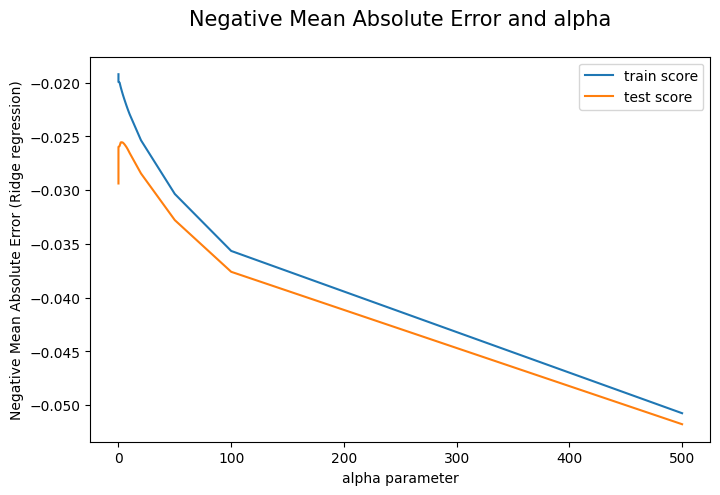

In [92]:

# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [93]:
# lambda best estimator
ridge_model_cv.best_estimator_

Ridge(alpha=3.0)

In [94]:
# Hyperparameter lambda = 1.0
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
#ridge.coef_
#Lets calculate the mean squared error value
mse = mean_squared_error(y_train, ridge.predict(X_train))
print("The mean squared error value is ",mse)
# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)


The mean squared error value is  0.0009472129960129189
The r2 value of train data is  0.9384395525110093


In [95]:
ridge.fit(X_test,y_test)
y_test_pred = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(r2_score(y_test, y_test_pred))

0.03115501423756808
0.9391122777021567


In [96]:

ridge.fit(X_test,y_test)
y_test_pred = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(r2_score(y_test, y_test_pred))

0.03115501423756808
0.9391122777021567


Fitting 5 folds for each of 11 candidates, totalling 55 fits


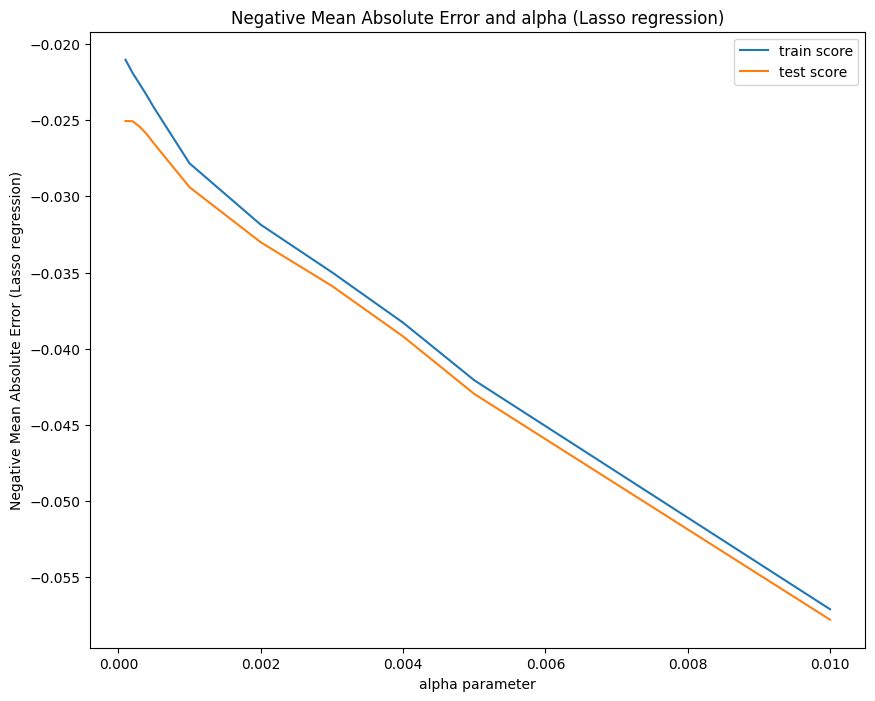

In [97]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=500]
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [98]:

# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [99]:
# # Hyperparameter lambda = 0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_


array([-3.47046277e-02,  8.01568342e-03,  3.42401618e-02,  1.23318454e-01,
        6.82283981e-02,  0.00000000e+00,  3.53450845e-02,  5.59990563e-02,
       -0.00000000e+00, -2.58846205e-02, -0.00000000e+00,  2.32952266e-02,
        1.53778127e-02,  6.08378698e-03,  4.33094507e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -9.54102984e-04,  2.24896319e-01,
        3.38439466e-02,  1.69408311e-02, -6.42945323e-02, -0.00000000e+00,
       -1.13202566e-02,  0.00000000e+00,  0.00000000e+00,  1.50910996e-02,
        0.00000000e+00,  2.23823656e-02,  1.29270450e-03, -0.00000000e+00,
        2.31426375e-03,  0.00000000e+00, -1.73552569e-02, -4.21352878e-03,
        0.00000000e+00,  1.13113534e-02, -6.94123098e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        9.26601542e-05,  1.23042610e-02,  0.00000000e+00, -2.59796427e-03,
        2.11858172e-02, -1.09035173e-02, -1.14740138e-02,  0.00000000e+00,
       -0.00000000e+00, -

In [100]:

#Lets calculate the mean squared error value
mse = mean_squared_error(y_train, lasso.predict(X_train))
print("The mean squared error value is ",mse)
# predicting the R2 value of train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The mean squared error value is  0.0009707838136888879
The r2 value of train data is  0.9369076583225618


In [101]:
# Create a list of columns to drop from X_test
columns_to_drop = [col for col in X_test.columns if col not in X_train.columns]
print(len(columns_to_drop))
print(X_test.shape)
X_test_rfe = X_test.drop(columns=columns_to_drop)
lasso.fit(X_test_rfe,y_test)
y_test_pred = lasso.predict(X_test_rfe)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(r2_score(y_test, y_test_pred))

0
(403, 224)
0.02966170849560128
0.9448092691620592


# 10. Conclusion :

The optimal value of LAMBDA we got in case of Ridge and Lasso is :
- Ridge - **3.0**
- Lasso - **0.0001**

## Assignment Part - II ( Finding solutions for the subjective questions, Please refer the PDF file for the complete answers)  

**Question 1** : What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [102]:
#Lets find for Ridge first
alpha = 3.0 # Optimal value of alpha is 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print("The output when alpha is 4: ")
mse = mean_squared_error(y_train, ridge.predict(X_train))
print("The mean squared error value of train data is ",mse)
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value of test data is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()

The output when alpha is 4: 
The mean squared error value of train data is  0.0009472129960129189
The mean squared error value of test data is  0.0015129109188580304
The r2 value of train data is  0.9369076583225618
The r2 value of test data is  0.9448092691620592



In [103]:
alpha = 6.0 
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 6: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 6: 
The mean squared error value is  0.0015295259041306838
The r2 value of train data is  0.9369076583225618
The r2 value of test data is  0.9448092691620592


In [104]:
#Let's create a ridge model with alpha  = 4.0
ridge_doubled = Ridge(alpha = 4.0)
ridge_doubled.fit(X_train,y_train)
y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)

ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top predictor features for ridge when alpha is 6 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top predictor features for ridge when alpha is 6 are :

                      Coefficient
Total_sqr_footage        0.134351
OverallQual              0.088469
TotalBsmtSF              0.079235
Neighborhood_StoneBr     0.058877
TotRmsAbvGrd             0.046711
Total_Bathrooms          0.045971
OverallCond              0.044430
GarageArea               0.044175
LotArea                  0.038149
Neighborhood_NoRidge     0.035671


In [105]:
#Now lets calculate for Lasso
alpha = 0.0001 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0001: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 0.0002 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0002: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 0.0001: 
The mean squared error value is  0.0014895373420533808
The r2 value of train data is  0.9369076583225618
The r2 value of test data is  0.9065616382631766

The output when alpha is 0.0002: 
The mean squared error value is  0.0014958564828966149
The r2 value of train data is  0.9313084900646047
The r2 value of test data is  0.9061652398975188


In [106]:
#Let's create a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features of Lasso when alpha is 0.0002 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features of Lasso when alpha is 0.0002 are:

                       Coefficient
Total_sqr_footage         0.225682
OverallQual               0.133786
Neighborhood_StoneBr      0.065950
TotalBsmtSF               0.060540
OverallCond               0.058713
Neighborhood_NridgHt      0.044229
GarageArea                0.043697
Neighborhood_NoRidge      0.035138
SaleCondition_Partial     0.032983
BsmtExposure_Gd           0.030938


**Question 3** :After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 1146 to 858
Columns: 224 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(25), int64(199)
memory usage: 1.6 MB


In [108]:
alpha = 0.0001 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso_pred =  pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print(lasso_pred.sort_values(by = 'Coefficient', ascending = False).head(10))
top_5_predictors = lasso_pred['Coefficient'].nlargest(5).index
X_train_dropped = X_train.drop(columns=top_5_predictors)
#print(X_train_dropped.columns)
print('r2 score',metrics.r2_score(y_true=y_train, y_pred= lasso.predict(X_train)))

                       Coefficient
Total_sqr_footage         0.225682
OverallQual               0.133786
Neighborhood_StoneBr      0.065950
TotalBsmtSF               0.060540
OverallCond               0.058713
Neighborhood_NridgHt      0.044229
GarageArea                0.043697
Neighborhood_NoRidge      0.035138
SaleCondition_Partial     0.032983
BsmtExposure_Gd           0.030938
r2 score 0.9369076583225618


In [238]:
#Lasso prediction by dropping top5 predictors
lasso.fit(X_train_dropped, y_train) 
lasso_pred =  pd.DataFrame(lasso.coef_ , columns = ['Coefficient'], index =  X_train_dropped.columns)
y_train_pred = lasso.predict(X_train_dropped)

In [239]:
print('Applying Lasso after dropping 5 predictor variables')
print(lasso_pred.sort_values(by = 'Coefficient', ascending = False).head(10))
print('r2 score',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Applying Lasso after dropping 5 predictor variables
                       Coefficient
TotRmsAbvGrd              0.129455
Total_Bathrooms           0.112029
GarageArea                0.105183
Fireplaces                0.051469
LotArea                   0.048502
Street_Pave               0.047245
Neighborhood_NoRidge      0.044297
BsmtExposure_Gd           0.042970
BsmtUnfSF                 0.040704
SaleCondition_Partial     0.033489
r2 score 0.9050034157050509
